In [0]:
#load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import numpy as np

import tensorflow as tf

import keras 
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Lambda
from keras import optimizers

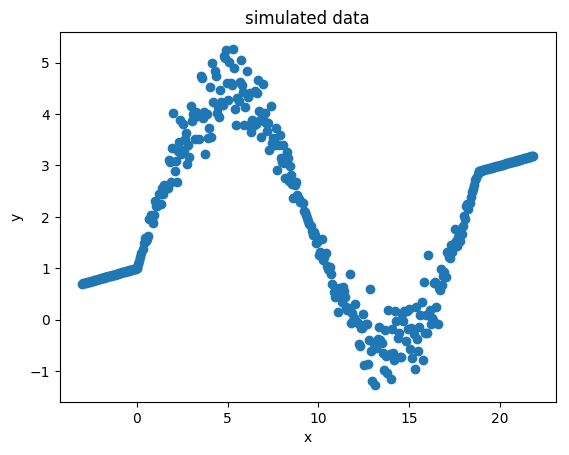

In [11]:
## Simulate some data 
np.random.seed(32)
n = 300
x = np.linspace(0,1*2*np.pi,n)
y1 = 3*np.sin(x)
y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
y2 = 0.1*x+1
y=y1+y2
plt.scatter(x=x,y=y,marker='o')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
n=len(x)

In [0]:
#lambda t: tf.slice(t,[0,0],[-1,1])#erste spalte nehmen
#lambda t: tf.slice(t,[0,1],[-1,1])#zweite spalte nehmen

In [13]:
model = Sequential()
model.add(Lambda(lambda t: tf.slice(t,[0,0],[-1,1]),batch_input_shape=(None, 2)))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 1)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [14]:
test=np.zeros((10,2))
test[:,0]=1
print(test)
#spalte 1 alles 1, spalte 2 alles 0
model.predict(test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [0]:
def my_loss(y_true,y_pred):
  mu=tf.slice(y_pred,[0,0],[-1,1])          ## erste spalte des outputs
  log_sigma=tf.slice(y_pred,[0,1],[-1,1])   ## zweite spalte des outputs
  
  a=1/(tf.sqrt(2*3.141*tf.square(tf.exp(log_sigma)))) 
  b1=tf.square(mu-y_true)
  b2=2*tf.square(tf.exp(log_sigma))
  b=b1/b2
  
  loss = tf.reduce_sum(-tf.log(a)+b,axis=0)
  return loss  

In [0]:
#tf.reset_default_graph() #Just to be sure to start with an empty graph
#
#X = tf.placeholder('float32', shape=[None,1], name='x_data')
#Y = tf.placeholder('float32', shape=[None,1], name='y_data')
#
#W1 = tf.layers.dense(inputs=X,units=20,activation='relu', name ='W1') 
#W2 = tf.layers.dense(inputs=W1,units=50,activation='relu', name ='W2') 
#W3 = tf.layers.dense(inputs=W2,units=20,activation='relu', name ='W3') 
#
#mu = tf.layers.dense(inputs=W3,units=1,activation='linear', name ='mu') 
#log_sigma = tf.layers.dense(inputs=W3,units=1,activation='linear', name= 'log_sigma') 
#
#a=1/(tf.sqrt(2*3.141*tf.square(tf.exp(log_sigma)))) 
#b1=tf.square(mu-Y)
#b2=2*tf.square(tf.exp(log_sigma))
#b=b1/b2
#
#loss = tf.reduce_sum(-tf.log(a)+b,axis=0)
#
#train_op = tf.train.AdamOptimizer(0.00003).minimize(loss)
#
#init_op = tf.global_variables_initializer() 
#

In [17]:
model = Sequential()
model.add(Dense(20, activation='relu',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='linear'))


model.summary()
model.compile(loss=my_loss,optimizer=keras.optimizers.Adam(lr=0.00003),metrics=[my_loss])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 42        
Total params: 2,152
Trainable params: 2,152
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(x, y, 
                  batch_size=n, 
                  epochs=40000,
                  verbose=0)

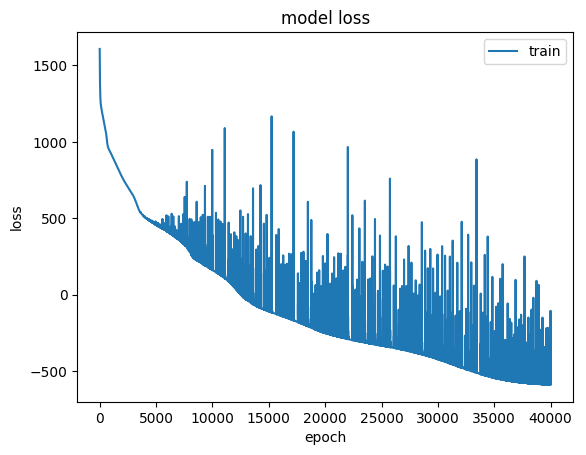

In [19]:
plt.plot(history.history['my_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

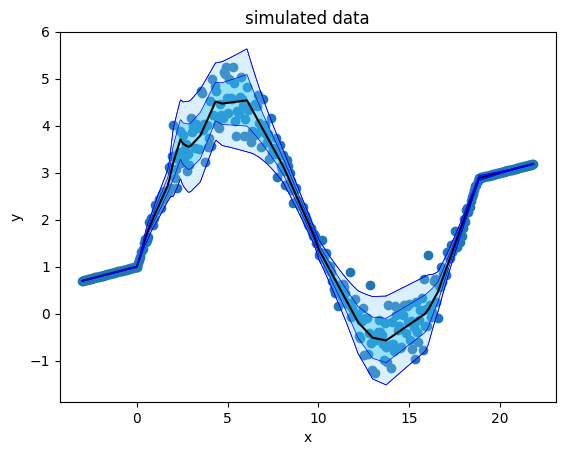

In [20]:

x_pred=np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1)
pred_mu=model.predict(np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1))[:,0]
pred_log_sigma=model.predict(np.linspace(-3,3*2*np.pi+3,1000).reshape(1000,1))[:,1]
plt.scatter(x,y,marker='o')
plt.plot(x_pred,pred_mu,c="black")

pred_1_sd_p = pred_mu+(np.exp(pred_log_sigma))
pred_1_sd_m = pred_mu-(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_1_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_1_sd_m, 'b', linewidth=0.5)

pred_2_sd_p = pred_mu+2*(np.exp(pred_log_sigma))
pred_2_sd_m = pred_mu-2*(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_2_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_2_sd_m, 'b', linewidth=0.5)

plt.plot(x_pred,pred_mu+2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)
plt.plot(x_pred,pred_mu-2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)

plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_2_sd_p,
                         pred_2_sd_m[::-1]]),alpha=0.3, fc='lightskyblue', ec='None')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_1_sd_p,
                         pred_1_sd_m[::-1]]),alpha=0.3, fc='deepskyblue', ec='None')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()